# Time Series Data
* We've already seen pandas can handle date/time formats
* Time series data adds new manipulation options to our data, and pandas was actually developed with time series data in mind.

## Resampling 
* the process of converting a time series from one frequency to another.
  * downsampling: going from a high frequency (e.g. daily) to a lower frequency (e.g. weekly)
  * upsampling: going from a lower frequency to higher frequency
  * remapping: aligning data to a set frequency (e.g. mapping weekly data to sundays)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We can create date ranges with
pd.date_range?

2018-01-01    0.077096
2018-01-02    0.696615
2018-01-03   -1.157121
2018-01-04   -1.116528
2018-01-05    0.632130
Freq: D, dtype: float64

In [4]:
# Some sample data
dates = pd.date_range(start='1/1/2018', end='05/31/2018')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts.head()

2018-01-01   -1.502781
2018-01-02    0.254105
2018-01-03   -0.802045
2018-01-04    0.032891
2018-01-05    0.006677
Freq: D, dtype: float64

In [7]:
# You need a date or time index on your dataframe to do some resampling
# When we resample we need to determine the new frequency we want and how we want to resample
# Let's change our daily data down to weekly data
resampler=ts.resample('W')
resampler

In [9]:
# Just like groupby, this is an object which will do the resampling for us
# Since we are downsampling (D->W) we need to decide how to aggregate our datapoints
# We are now very used to this!
resampler.apply(np.mean).head()

2018-01-07   -0.319515
2018-01-14   -0.087015
2018-01-21    0.249618
2018-01-28    0.231306
2018-02-04   -0.055066
Freq: W-SUN, dtype: float64

* Notice the frequency is now W-SUN (weekly beginning on sunday)
* When we downsample we are "binning" our values and need to determine which end of the bin is open/closed
* By default the right side is closed for weekly binning, which we did here
* Let's look at an example using minute data


In [14]:
ts = pd.Series(np.arange(12), index=pd.date_range(start='1/1/2018', periods=12,freq='T'))
ts.head()

2018-01-01 00:00:00    0
2018-01-01 00:01:00    1
2018-01-01 00:02:00    2
2018-01-01 00:03:00    3
2018-01-01 00:04:00    4
Freq: T, dtype: int64

In [18]:
ts.resample("5min", closed='left').apply(np.sum)

2018-01-01 00:00:00    10
2018-01-01 00:05:00    35
2018-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [19]:
ts.resample("5min", closed='right').apply(np.sum)

2017-12-31 23:55:00     0
2018-01-01 00:00:00    15
2018-01-01 00:05:00    40
2018-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [31]:
# Also, downresampling really is an aggregation exercise, so you can do all sorts of things
# What do you think this does in real language?
ts.resample('2min').apply(lambda x: pd.Series({"mean":np.mean(x),"max":np.max(x)})).unstack()

,mean,max
2018-01-01 00:00:00,0.5,1.0
2018-01-01 00:02:00,2.5,3.0
2018-01-01 00:04:00,4.5,5.0
2018-01-01 00:06:00,6.5,7.0
2018-01-01 00:08:00,8.5,9.0
2018-01-01 00:10:00,10.5,11.0


In [69]:
df.head()

,time,usr,sys,idl,wai,hiq,siq
time,,,,,,,
2019-10-19 16:19:07,19-10 16:19:07,4.034,0.688,95.131,0.138,0.0,0.008
2019-10-19 16:19:08,19-10 16:19:08,0.754,0.251,98.995,0.000,0.0,0.000
2019-10-19 16:19:09,19-10 16:19:09,7.955,0.505,91.288,0.253,0.0,0.000
2019-10-19 16:19:10,19-10 16:19:10,21.717,4.545,61.364,12.121,0.0,0.253
2019-10-19 16:19:11,19-10 16:19:11,5.675,3.909,78.815,11.475,0.0,0.126


In [72]:
# Inline assignment!
df=pd.read_csv('dstat_si330.csv',skiprows=6)
df=df.set_index(pd.DatetimeIndex(pd.to_datetime(df["time"].apply(lambda x: x[6:]))))
# Generate me a dataframe which shows the 5 second averages and standard deviations of the idl (CPU idle) time

# ten mins?

,mean,std
time,,
2019-10-19 16:19:05,95.1380,3.146373
2019-10-19 16:19:10,72.5958,5.961332
2019-10-19 16:19:15,86.6974,6.369460
2019-10-19 16:19:20,85.7178,5.432176
2019-10-19 16:19:25,81.6432,7.651377
2019-10-19 16:19:30,93.0062,3.183883
2019-10-19 16:19:35,96.7136,1.058977
2019-10-19 16:19:40,91.8480,5.700882
2019-10-19 16:19:45,92.6942,3.225499


In [73]:
# With upsampling there is no need to aggregate. 

# let's create a dataframe, with two weekly indices, and four columns. First the indicies
dates = pd.date_range(start='1/1/2018', periods=2, freq='W')
# now let's fill in the DataFrame
df = pd.DataFrame(np.random.randn(2,4), index=dates, 
                  columns=['col1','col2','col3','col4'])
df.head()

,col1,col2,col3,col4
2018-01-07,2.060465,1.702496,1.370201,1.067547
2018-01-14,1.117917,0.282558,-0.266234,-0.568707


In [74]:
# Now we upsample from weekly frequency to daily frequency,
df_daily = df.resample('D').asfreq()
df_daily.head()

,col1,col2,col3,col4
2018-01-07,2.060465,1.702496,1.370201,1.067547
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN


In [75]:
# As you notice, there will be NaN values, let's engage in interpolation
# Foprward fill or backward fill
df.resample('D').ffill()

,col1,col2,col3,col4
2018-01-07,2.060465,1.702496,1.370201,1.067547
2018-01-08,2.060465,1.702496,1.370201,1.067547
2018-01-09,2.060465,1.702496,1.370201,1.067547
2018-01-10,2.060465,1.702496,1.370201,1.067547
2018-01-11,2.060465,1.702496,1.370201,1.067547
2018-01-12,2.060465,1.702496,1.370201,1.067547
2018-01-13,2.060465,1.702496,1.370201,1.067547
2018-01-14,1.117917,0.282558,-0.266234,-0.568707


In [76]:
# We can also choose to only fill a certain number of periods, by using the limit parameter in the ffill()
# function. For instance, here, we are limiting to interpolating three observations
df.resample('D').ffill(limit=3)

,col1,col2,col3,col4
2018-01-07,2.060465,1.702496,1.370201,1.067547
2018-01-08,2.060465,1.702496,1.370201,1.067547
2018-01-09,2.060465,1.702496,1.370201,1.067547
2018-01-10,2.060465,1.702496,1.370201,1.067547
2018-01-11,NaN,NaN,NaN,NaN
2018-01-12,NaN,NaN,NaN,NaN
2018-01-13,NaN,NaN,NaN,NaN
2018-01-14,1.117917,0.282558,-0.266234,-0.568707


## Moving Window Functions
* sometimes we want to do manipulation on a chunk of a dataframe by time period, e.g. 5 mins, instead of using groups
* let's look at examples on the stock market. We are going to look at Apple and Microsoft's daily stock price from 2012 to 2018

In [77]:
apple = pd.read_csv("datasets/AAPL.csv")
ms = pd.read_csv("datasets/MSFT.csv")

apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.172771,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.383293,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,39.820515,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.236809,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.172970,98506100


In [78]:
# Let's look at close price
df = pd.DataFrame({'AAPL': apple['Close'],'MSFT':ms['Close']})
df.head()

,AAPL,MSFT
0,58.747143,26.770000
1,59.062859,27.400000
2,59.718571,27.680000
3,60.342857,28.110001
4,60.247143,27.740000


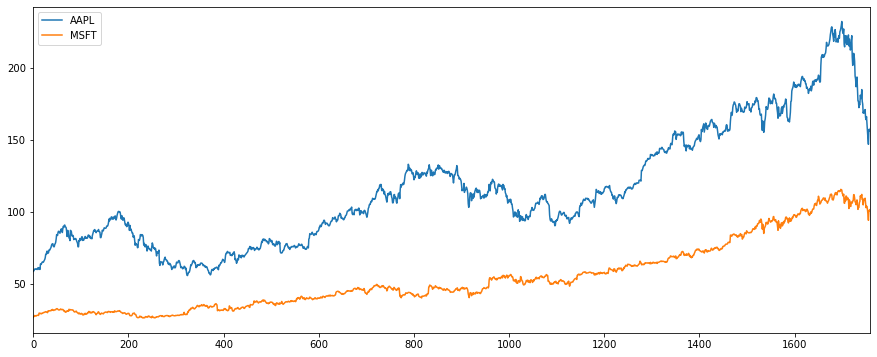

In [83]:
# Now let's plot the prices over the years
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
df.plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


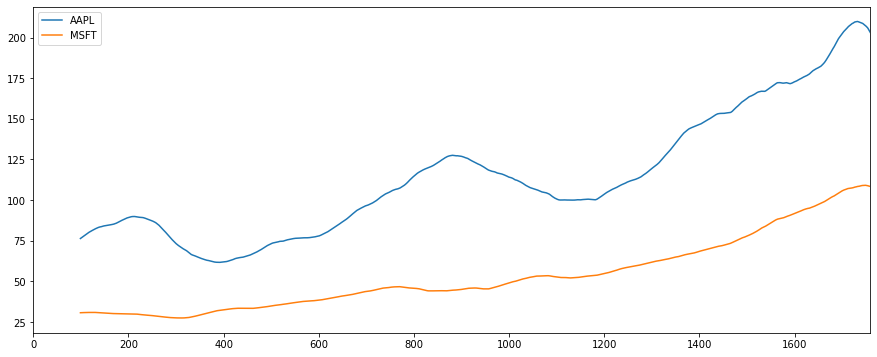

In [84]:
# The rolling() operator lets us specify a window and apply a function
# Here, let's do a 100 day rolling window where we average the values and plot it.
df.rolling(100).apply(np.mean).plot()
plt.show()

* These are just the very basics of manipulating time series data in python.
* Your project would be a *great* place to do some independent exploration of additional time series functionality